In [32]:
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22 extra nodes, 0 pruned nodes, max_depth=5
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24 extra nodes, 0 pruned nodes, max_depth=4
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=6
[15:06:38] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=6
[15:06:38] /work

In [2]:
shap_values[0,:]

array([ 2.1455370e-01,  1.3466646e-03,  1.8625211e-02,  0.0000000e+00,
       -4.0719929e-01, -1.1618353e+00, -5.1294088e-02, -3.4201446e-01,
       -4.0446207e-02,  5.4874159e-03,  5.0436582e-02,  2.7335213e-02,
        3.9443178e+00], dtype=float32)

In [3]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

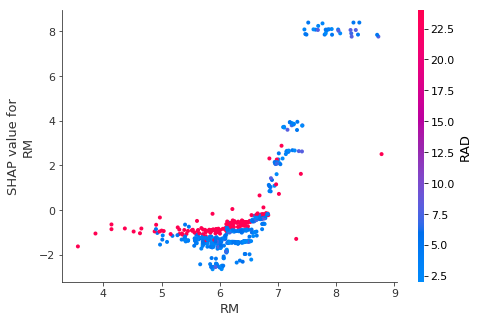

In [4]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

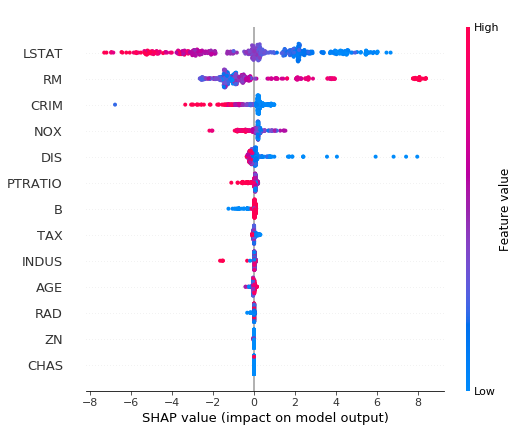

In [5]:
shap.summary_plot(shap_values, X)

In [26]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

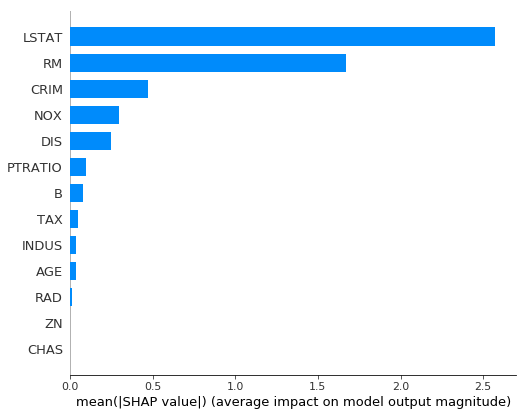

In [7]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [28]:
background = sklearn.utils.resample(X, n_samples=100, replace=False)
explainer = shap.TreeExplainer(model, background, model_output='probability',
                               feature_dependence='independent')

Exception ignored in: 'array_dealloc'
SystemError: <class 'DeprecationWarning'> returned a result with an error set


SystemError: <built-in function dense_tree_update_weights> returned NULL without setting an error

In [8]:
# use Kernel SHAP to explain test set predictions
explainer = shap.KernelExplainer(model.predict, X, link="logit")
shap_values = explainer.shap_values(X_test, nsamples=100)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], X.iloc[0,:], link="logit")

Provided model function fails when applied to the provided data set.


AttributeError: 'numpy.ndarray' object has no attribute 'feature_names'

In [16]:
model.attributes()

{}

In [3]:
from sklearn.datasets import load_digits
import lightgbm as lbm
import shap
import sklearn
import numpy as np

digits = load_digits()
X = digits['data']
Y = digits['target']
Y = (Y == 5).astype(int)
dtrain = lbm.Dataset(X, Y)

PARAM = {'task':'train', 'boosting_type': 'gbrt',
         'objective': 'binary',
         'metric': 'auc',
         'verbose':-1}

bst = lbm.train(PARAM, dtrain, num_boost_round=100, verbose_eval=False)
background = sklearn.utils.resample(X, n_samples=100, replace=False)
explainer = shap.TreeExplainer(bst, background, model_output='probability',
                               feature_dependence='independent')
shap_values = explainer.shap_values(X)

# this outputs essentially zero
print(np.abs(explainer.expected_value + shap_values.sum(axis=1) - bst.predict(X)).max())

2.4136226683957318e-08


In [4]:
explainer

In [5]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])

In [6]:
str(type(bst))

"<class 'lightgbm.basic.Booster'>"

In [1]:
import lightgbm as lbm
import shap
import sklearn
import numpy as np

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()

# change the problem to categorical
y_cat = y < np.mean(y)
# go as usual

dtrain = lbm.Dataset(X, y_cat)

PARAM = {'task':'train', 'boosting_type': 'gbrt',
         'objective': 'binary',
         'metric': 'auc',
         'verbose':-1}

bst = lbm.train(PARAM, dtrain, num_boost_round=100, verbose_eval=False)
background = sklearn.utils.resample(X, n_samples=100, replace=False)
explainer = shap.TreeExplainer(bst, background, model_output='probability', feature_dependence='independent')
shap_values = explainer.shap_values(X)

# this outputs essentially zero
print(np.abs(explainer.expected_value + shap_values.sum(axis=1) - bst.predict(X)).max())

AttributeError: 'TreeEnsemble' object has no attribute 'values'

In [4]:
import lightgbm as lbm
import shap
import sklearn
import numpy as np

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = shap.datasets.boston()

# change the problem to categorical
y_cat = y < np.mean(y)
# go as usual

dtrain = lbm.Dataset(X, y_cat)

PARAM = {'task':'train', 'boosting_type': 'gbrt',
         'objective': 'binary',
         'metric': 'auc',
         'verbose':-1}

bst = lbm.train(PARAM, dtrain, num_boost_round=100, verbose_eval=False)
background = sklearn.utils.resample(X, n_samples=100, replace=False)
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(X)

# this outputs essentially zero
print(np.abs(explainer.expected_value + shap_values.sum(axis=1) - bst.predict(X)).max())

10.246080316156043


In [23]:
shap.force_plot(explainer.expected_value, shap_values[10,:], X.iloc[10])

In [24]:
bst.predict(X.iloc[10])

/home/r/miniconda3/envs/shap-env/lib/python3.6/site-packages/lightgbm/basic.py:469: UserWarning: Converting data to scipy sparse matrix.
  warnings.warn('Converting data to scipy sparse matrix.')


array([0.99734578])

In [9]:
explainer.expected_value - shap_values[0,:]

array([ 0.8974308 ,  1.44378766,  2.68744063,  1.17412762,  1.33187881,
        1.65452395,  1.17999747,  1.33646257, -0.27963457,  1.40487709,
        1.94491137,  1.62200065,  5.00661611])

### example percent 

In [11]:
import pandas as pd

In [20]:
interpretation = pd.DataFrame({"name":X.columns,"value":shap_values[0,:]})
interpretation['impact_from_base'] = explainer.expected_value - interpretation['value'].abs()
interpretation['impact_from_base'] = interpretation['impact_from_base'].abs()
interpretation['impact_from_base'] = (interpretation['impact_from_base'] / interpretation['impact_from_base'].sum())
interpretation.sort_values(by=['impact_from_base'], ascending=False)

name     value  impact_from_base
12    LSTAT -3.827009          0.215550
6       AGE -0.000390          0.096011
3      CHAS  0.005480          0.095597
4       NOX -0.152271          0.083645
7       DIS -0.156855          0.083272
9       TAX -0.225270          0.077702
1        ZN -0.264180          0.074533
0      CRIM  0.282177          0.073068
11        B -0.442393          0.060023
5        RM -0.474917          0.057375
10  PTRATIO -0.765304          0.033732
2     INDUS -1.507833          0.026724
8       RAD  1.459242          0.022768

In [17]:
interpretation['impact_from_base'].sum()

12.282097901284015